<a href="https://colab.research.google.com/github/elenasofia98/PracticalNLP-2023-2024/blob/main/HoL04_1_WordNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#WordNet

https://wordnet.princeton.edu/

WordNet is a **lexical database** for the English language.

NLTK has a simple interface for searching words in WordNet.

The fondamental object in WordNet is a *Synset*. *Synsets* are groupings of synonyms, that is, words expressing the same concept.
Some words have only one *Synset*, others -- ambiguous ones -- have several.
Wordnet hence organizes words (or *lemmas* tbh) into synsets.

We can find a number of relations over sysets.



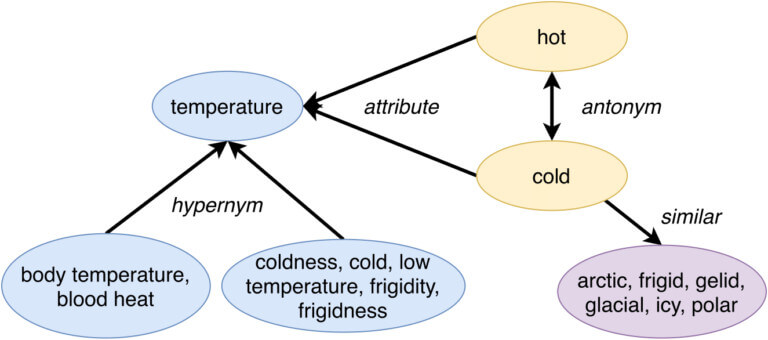

In [9]:
import nltk

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
from nltk.corpus import wordnet
syns = wordnet.synsets('happiness')
[syn.name() for syn in syns]

['happiness.n.01', 'happiness.n.02']

In [11]:
for syn in syns:
    print(syn.name(), syn.definition())

happiness.n.01 state of well-being characterized by emotions ranging from contentment to intense joy
happiness.n.02 emotions experienced when in a state of well-being


**lemmas and synonyms**

We can also search lemmas to find synonyms for a word.
A Synset represents a group of lemmas that all have the same meaning, while a lemma represents a distinct word form.
(*lemma:* canonical or morphological form of a word).

In [12]:
from nltk.corpus import wordnet
syn = wordnet.synsets('happiness')[0]
lemmas = syn.lemmas()
lemmas

[Lemma('happiness.n.01.happiness'), Lemma('happiness.n.01.felicity')]

In [13]:
wordnet.synsets('happiness')[1].lemmas()

[Lemma('happiness.n.02.happiness')]

In [14]:
lemmas[0].name(), lemmas[1].name()

('happiness', 'felicity')

The synonyms of a word are returned as a nested list of synonyms of the different senses of the input word in the given language, since these different senses are not mutual synonyms


In [15]:
wordnet.synonyms('happiness')

[['felicity'], []]

Nouns and verbs are organized into hierarchies based on the hypernymy/hyponymy relation between synsets. Additional pointers are be used to indicate other relations.



Pertainyms are relational adjectives and do not follow the structure just described. Pertainyms do not have antonyms; the synset for a pertainym most often contains only one word or collocation and a lexical pointer to the noun that the adjective is "pertaining to". Participial adjectives have lexical pointers to the verbs that they are derived from.

Adverbs are often derived from adjectives, and sometimes have antonyms; therefore the synset for an adverb usually contains a lexical pointer to the adjective from which it is derived.

## Links

https://wordnet.princeton.edu/documentation/wngloss7wn

Information in WordNet is organized around logical groupings called synsets. Each synset consists of a list of synonymous words or collocations (eg. "fountain pen" , "take in" ), and pointers that describe the relations between this synset and other synsets. A word or collocation may appear in more than one synset, and in more than one part of speech. The words in a synset are grouped such that they are interchangeable in some context.

Two kinds of relations are represented by pointers: lexical and semantic. Lexical relations hold between semantically related word forms; semantic relations hold between word meanings.

These relations include (but are not limited to) hypernymy/hyponymy (superordinate/subordinate), antonymy, entailment, and meronymy/holonymy.

In [16]:
syn = wordnet.synsets('happiness')[0]
happiness = syn.lemmas()[0]
happiness

Lemma('happiness.n.01.happiness')

The three relations below exist only on lemmas, not on synsets.

In [17]:
display(happiness.derivationally_related_forms())
display(happiness.pertainyms())
display(happiness.antonyms())

[Lemma('felicitous.s.02.happy'), Lemma('happy.a.01.happy')]

[]

[Lemma('unhappiness.n.02.unhappiness')]

Adjectives are arranged in clusters containing head synsets and satellite synsets. Each cluster is organized around antonymous pairs (and occasionally antonymous triplets). The antonymous pairs (or triplets) are indicated in the head synsets of a cluster. Most head synsets have one or more satellite synsets, each of which represents a concept that is similar in meaning to the concept represented by the head synset. One way to think of the adjective cluster organization is to visualize a wheel, with a head synset as the hub and satellite synsets as the spokes. Two or more wheels are logically
connected via antonymy, which can be thought of as an axle between the wheels.

s and a pos:

- https://wordnet.princeton.edu/documentation/wndb5wn documents this as ADJECTIVE SATELLITE.

- https://wordnet.princeton.edu/documentation/wngloss7wn explains that adjectives are subcategorized into "head" and "satellite" synsets within an "adjective cluster":


In [18]:
ga1 = wordnet.synset('good.a.1')
ga1.definition(), ga1.lemmas()

('having desirable or positive qualities especially those suitable for a thing specified',
 [Lemma('good.a.01.good')])

In [19]:
evils = ga1.lemmas()[0].antonyms()
for evil in evils:
    print(evil.name(), "("+evil.synset().name()+"):", evil.synset().definition())

bad (bad.a.01): having undesirable or negative qualities


In [20]:
gs6 = wordnet.synset('good.s.07') # "a genuinely good person"; "a just cause"; "an upright and respectable man"
gs6.definition(), gs6.lemmas()

('of moral excellence',
 [Lemma('good.s.07.good'),
  Lemma('good.s.07.just'),
  Lemma('good.s.07.upright')])

In [21]:
# get the head given a satellite and viceversa
gs6.similar_tos()

[Synset('righteous.a.01')]

In [22]:
wordnet.synset('cold.a.01').similar_tos()

[Synset('acold.s.01'),
 Synset('algid.s.01'),
 Synset('arctic.s.02'),
 Synset('bleak.s.03'),
 Synset('chilly.s.02'),
 Synset('crisp.s.03'),
 Synset('frigorific.s.01'),
 Synset('frore.s.01'),
 Synset('frosty.s.02'),
 Synset('heatless.s.01'),
 Synset('ice-cold.s.01'),
 Synset('refrigerant.s.01'),
 Synset('refrigerated.s.01'),
 Synset('shivery.s.01'),
 Synset('stone-cold.s.01'),
 Synset('unheated.s.01')]

In [23]:
vocal = wordnet.lemma('vocal.a.01.vocal')
display(vocal.derivationally_related_forms()) # Terms in different syntactic categories that have the same root form and are semantically related.
display(vocal.pertainyms()) # A word, usually an adjective, which can be defined as "of or pertaining to" another word.
display(vocal.antonyms()) # a word that means the opposite of another word: a pair of words between which there is an associative bond resulting from their frequent co-occurrence.

[Lemma('vocalize.v.02.vocalize')]

[Lemma('voice.n.02.voice')]

[Lemma('instrumental.a.01.instrumental')]

### Across Synsets

In [24]:
human = wordnet.synsets('human')[0]
human.name(), human.definition()

('homo.n.02',
 'any living or extinct member of the family Hominidae characterized by superior intelligence, articulate speech, and erect carriage')

In [25]:
human.hypernyms()

[Synset('hominid.n.01')]

In [26]:
human.hyponyms()

[Synset('homo_erectus.n.01'),
 Synset('homo_habilis.n.01'),
 Synset('homo_sapiens.n.01'),
 Synset('homo_soloensis.n.01'),
 Synset('neandertal_man.n.01'),
 Synset('rhodesian_man.n.01'),
 Synset('world.n.08')]

In [27]:
human.hypernym_paths()

[[Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('living_thing.n.01'),
  Synset('organism.n.01'),
  Synset('animal.n.01'),
  Synset('chordate.n.01'),
  Synset('vertebrate.n.01'),
  Synset('mammal.n.01'),
  Synset('placental.n.01'),
  Synset('primate.n.02'),
  Synset('hominid.n.01'),
  Synset('homo.n.02')]]

In [28]:
erectus = wordnet.synset('homo_erectus.n.01')
sapiens = wordnet.synset('homo_sapiens.n.01')

In [29]:
sapiens.path_similarity(erectus)

0.3333333333333333

In [33]:
wordnet.synsets('dog')[0].definition()

'a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds'

In [32]:
wordnet.synsets('dog')[0].hypernym_paths()

[[Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('living_thing.n.01'),
  Synset('organism.n.01'),
  Synset('animal.n.01'),
  Synset('chordate.n.01'),
  Synset('vertebrate.n.01'),
  Synset('mammal.n.01'),
  Synset('placental.n.01'),
  Synset('carnivore.n.01'),
  Synset('canine.n.02'),
  Synset('dog.n.01')],
 [Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('living_thing.n.01'),
  Synset('organism.n.01'),
  Synset('animal.n.01'),
  Synset('domestic_animal.n.01'),
  Synset('dog.n.01')]]

In [40]:
domestic = wordnet.synset('domestic_animal.n.01')
domestic.hyponyms()#[1].definition())

[Synset('dog.n.01'),
 Synset('domestic_cat.n.01'),
 Synset('feeder.n.01'),
 Synset('head.n.02'),
 Synset('stocker.n.01'),
 Synset('stray.n.01')]

In [39]:
physical_entity = wordnet.synset('physical_entity.n.01')
print(physical_entity.hyponyms()[1].name(), physical_entity.hyponyms()[1].definition())
print(physical_entity.hyponyms()[3].name(), physical_entity.hyponyms()[3].definition())

matter.n.03 that which has mass and occupies space
process.n.06 a sustained phenomenon or one marked by gradual changes through a series of states


# Similarities

Synonyms are organized in a **hypernym** tree.

This tree can be used to reason about the similarity between the synonyms it contains.

*The closer the two synonyms are in the tree, the more similar they are.


If one were to examine all the hyponyms of reference_book (which is the hyperonym for cookbook), one would see that one of them is instruction_book

This intuitively looks very similar to cookbook, so let's see what WordNet similarity says about it with the help of the following code:

In [44]:
cb = wordnet.synset('cookbook.n.01')
ib = wordnet.synset('instruction_book.n.01')

In [45]:
cb.hypernym_paths(), ib.hypernym_paths()

([[Synset('entity.n.01'),
   Synset('physical_entity.n.01'),
   Synset('object.n.01'),
   Synset('whole.n.02'),
   Synset('artifact.n.01'),
   Synset('creation.n.02'),
   Synset('product.n.02'),
   Synset('work.n.02'),
   Synset('publication.n.01'),
   Synset('book.n.01'),
   Synset('reference_book.n.01'),
   Synset('cookbook.n.01')]],
 [[Synset('entity.n.01'),
   Synset('physical_entity.n.01'),
   Synset('object.n.01'),
   Synset('whole.n.02'),
   Synset('artifact.n.01'),
   Synset('creation.n.02'),
   Synset('product.n.02'),
   Synset('work.n.02'),
   Synset('publication.n.01'),
   Synset('book.n.01'),
   Synset('reference_book.n.01'),
   Synset('instruction_book.n.01')]])

In [43]:
wordnet.synset('instruction_book.n.01').wup_similarity(wordnet.synset('cookbook.n.01'))

0.9166666666666666

https://www.slideserve.com/collier/wordnet-an-overview

A B synset, P is the LCS (Least Common Subsumer), Root is the root of the taxonomy
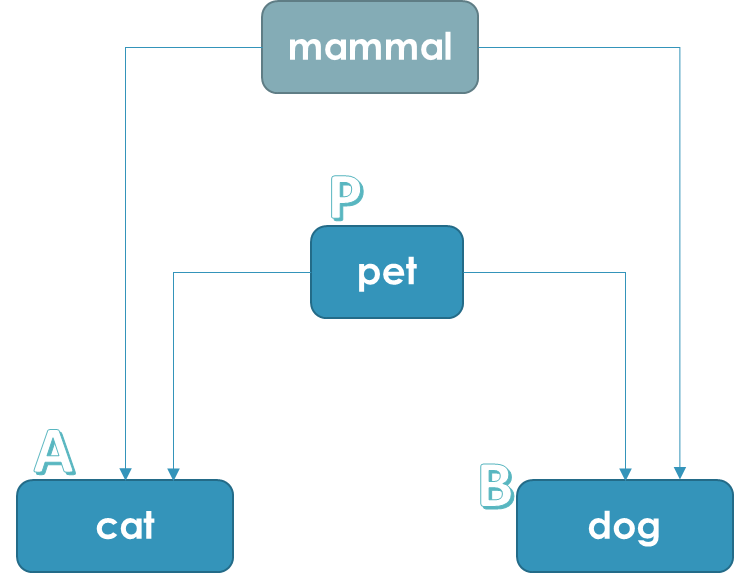



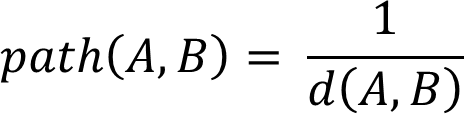

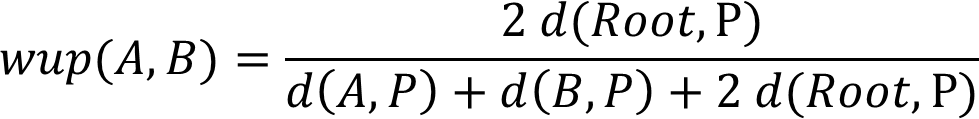

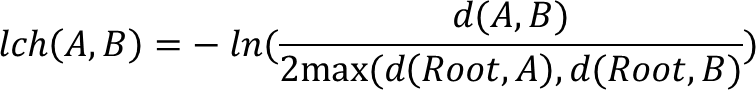


In [ ]:
dog = wn.synset('dog.n.01')

In [47]:
from nltk.corpus import wordnet as wn


giraffe = wn.synset('giraffe.n.01')
giraffe.hypernym_paths()

[[Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('living_thing.n.01'),
  Synset('organism.n.01'),
  Synset('animal.n.01'),
  Synset('chordate.n.01'),
  Synset('vertebrate.n.01'),
  Synset('mammal.n.01'),
  Synset('placental.n.01'),
  Synset('ungulate.n.01'),
  Synset('even-toed_ungulate.n.01'),
  Synset('ruminant.n.01'),
  Synset('giraffe.n.01')]]

In [ ]:
from nltk.corpus import wordnet as wn
import pandas as pd

dog = wn.synset('dog.n.01')
puppy = wn.synset('puppy.n.01')
giraffe = wn.synset('giraffe.n.01')
lion = wn.synset('lion.n.01')
monkey = wn.synset('monkey.n.01')

words = [dog, puppy, giraffe, lion, monkey]

"""path_similarity()"""
path_scores = []
for word in words:
    score = [word.path_similarity(word_) for word_ in words]
    path_scores.append(score)
path_df = pd.DataFrame(path_scores, columns = [x.name().split('.')[0] for x in words],
                     index = [x.name().split('.')[0] for x in words])

"""wup_similarity()"""
wup_scores = []
for word in words:
    score = [word.wup_similarity(word_) for word_ in words]
    wup_scores.append(score)
wup_df = pd.DataFrame(wup_scores, columns = [x.name().split('.')[0] for x in words],
                     index = [x.name().split('.')[0] for x in words])


"""lch_similarity()"""
lch_scores = []
for word in words:
    score = [word.lch_similarity(word_) for word_ in words]
    lch_scores.append(score)
lch_df = pd.DataFrame(lch_scores, columns = [x.name().split('.')[0] for x in words],
                     index = [x.name().split('.')[0] for x in words])

print('\n=====path_similarity=====\n', path_df)
print('=====wup_similarity=====\n', wup_df)
print('\n=====lch_similarity=====\n', lch_df)


=====path_similarity=====
               dog     puppy   giraffe      lion    monkey
dog      1.000000  0.500000  0.125000  0.166667  0.166667
puppy    0.500000  1.000000  0.111111  0.142857  0.142857
giraffe  0.125000  0.111111  1.000000  0.111111  0.142857
lion     0.166667  0.142857  0.111111  1.000000  0.142857
monkey   0.166667  0.142857  0.142857  0.142857  1.000000
=====wup_similarity=====
               dog     puppy   giraffe      lion    monkey
dog      0.928571  0.896552  0.758621  0.827586  0.814815
puppy    0.896552  0.866667  0.733333  0.800000  0.785714
giraffe  0.758621  0.733333  1.000000  0.733333  0.785714
lion     0.827586  0.800000  0.733333  1.000000  0.785714
monkey   0.814815  0.785714  0.785714  0.785714  1.000000

=====lch_similarity=====
               dog     puppy   giraffe      lion    monkey
dog      3.637586  2.944439  1.558145  1.845827  1.845827
puppy    2.944439  3.637586  1.440362  1.691676  1.691676
giraffe  1.558145  1.440362  3.637586  1.440362  